#----------------------------**Capston project III**---------------------------
# **Project title: classification(supervised learning)**

# **Project Name: Bank Marketing effectiveness prediction**

##**Contrubution**: individual

##**Name**: Kartik Nitturkar

# **Introduction**
With the startling rise over the last few decades of media
and technology which increases the amount of information
we have at our fingertips (cell phones, television, Internet,
etc.), humans are now more connected than ever. One result
of this is that marketing campaigns are growing evermore
pervasive in our daily lives. This glut of advertising has forced
businesses to compete for the attention of a populace that
has an ever growing amount of distractions. Thus raising
the question: How can businesses successfully advertise their
products in the most efficient way possible with the highest
possible rate of success? We will answer this question in the
context of banks advertising fixed term deposit products to
their customers. Using data collected from a previous bank
marketing campaign, a number of features centered around
the clients, the campaign itself, and general market conditions
will be explored. Based on this data, machine learning models
will predict which clients will subscribe and what banks can
do to increase the rate of subscription

# **Project Description**
 The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future statergies in order to improve marketing campaign for the bank

# **what is term deposit?**
A term deposit is a deposit tha ta bank a financial instituation offers with a fixed rate (often better than just opening deposit account) in which your money will be refunded bank at a specific maturity time.

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, recall_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from pprint import pprint
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

In [ ]:
# Reading our dataset
bank_df = pd.read_csv('/content/drive/MyDrive/Classification/bank-full.csv', sep=';')

In [ ]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# info of the dataset
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# **Feature**
### 1.age = age in years
### 2.job = Type of job('management' 'technician' 'entrepreneur' 'blue-collar'  'unknown''retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid''student')
### 3.marital = marital status('married' 'single' 'divorced')
### 4.education = Education background('tertiary' 'secondary' 'unknown' 'primary)
### 5.default = Has credit in default? ('no' 'yes)
### 6.balance = balance of the individual
### 7.housing = has housing loan? 'yes' or 'no'
### 8.loan = has personal load=n? 'yes' or 'no'
### 9.contact = contact communication type ('unknown' 'cellular' 'telephone')
### 10.day = last contact week of the month
### 11.month = last contact month of the year('may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep')
### 12.duration = last contact duration in second
### 13.campaign = number of contact performed during this campaign and for the client
### 14.pdays = number of days that passed by after the client was last contacted from previous campaign
### 15.previous = number of contact performed befor this campaign and for this client
### 16.poutcome = outcome of the previos marketing campaign and for this client('unknown' 'failure' 'other' 'success)
# **Label**
### 1.y = has the client subscribed a term deposit? 'yes' or 'no'

In [ ]:
# finding number of rows and features
bank_df.shape

(45211, 17)

In [ ]:
#statastics of our data
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
#Feature missing values
feature_na = [features for features in bank_df.columns if bank_df[features].isnull().sum()>0]
for feature in feature_na:
  print(feature, np.round(bank_df[features].isnull().mean(),4), '%missing values')
else:
  print("There is no missing values")

There is no missing values


#**Exploratory Data Analysis**



*   Finding the categorical features
*   Finding the perticular categorical features unique feature

*   Label encoding target variable

*   sepearting the numerical and categorical feature

*   joining our new categorical features into the our dataset

*   Finding the outliers from the numerical features
*   ploting the distribution graph
*   Checking the correlationship between numerical features
*   checking the dataset whether balanced or imbalanced
*   Modeling










In [ ]:
#Finding categorical features
categorical_features=[feature for feature in bank_df.columns if((bank_df[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [ ]:
# Finding the perticular categorical features unique feature
for col in bank_df.select_dtypes(include='object').columns:
  print(col)
  print(bank_df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [ ]:
#finfing the total unique veriables
for column in bank_df.columns:
  print(column,bank_df[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


In [ ]:
# Label encoding target variable
# converts label/words to numeric form without affecting dimensionality
# y- yes=1, no=0
bank_df['y'] = bank_df['y'].replace('yes', 1)
bank_df['y'] = bank_df['y'].replace('no', 0)
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
# object datatypes are chosen as categorical datatypes
# one hot encoding represents the categorical variables as binary, increasing the dimensionality of the dataset
cat_col=[col for col in bank_df.columns.values if bank_df[col].dtype=='object']
# sepearting the numerical and categorical feature
df_cat=bank_df[cat_col]
df_num= bank_df.drop(cat_col,axis=1)

In [ ]:
#dummy encoding the categorical features
df_cat_dum= pd.get_dummies(df_cat,drop_first=True)

In [ ]:
# joining our new categorical features into the our dataset
df_features=pd.concat([df_num,df_cat_dum], axis=1)

In [ ]:
df_features.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   y                    45211 non-null  int64
 8   job_blue-collar      45211 non-null  uint8
 9   job_entrepreneur     45211 non-null  uint8
 10  job_housemaid        45211 non-null  uint8
 11  job_management       45211 non-null  uint8
 12  job_retired          45211 non-null  uint8
 13  job_self-employed    45211 non-null  uint8
 14  job_services         45211 non-null  uint8
 15  job_student          45211 non-null  uint8
 16  job_technician       4

In [ ]:
# Finding total numbers Yes and No
bank_df['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

So we clearly observe here it is unbalanced dataset and 1 values are 8x more of 0

In [ ]:
#checking null values
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

in our dataset there is no null values are present so no need to remove the null values from the dataset

# **vizualization**

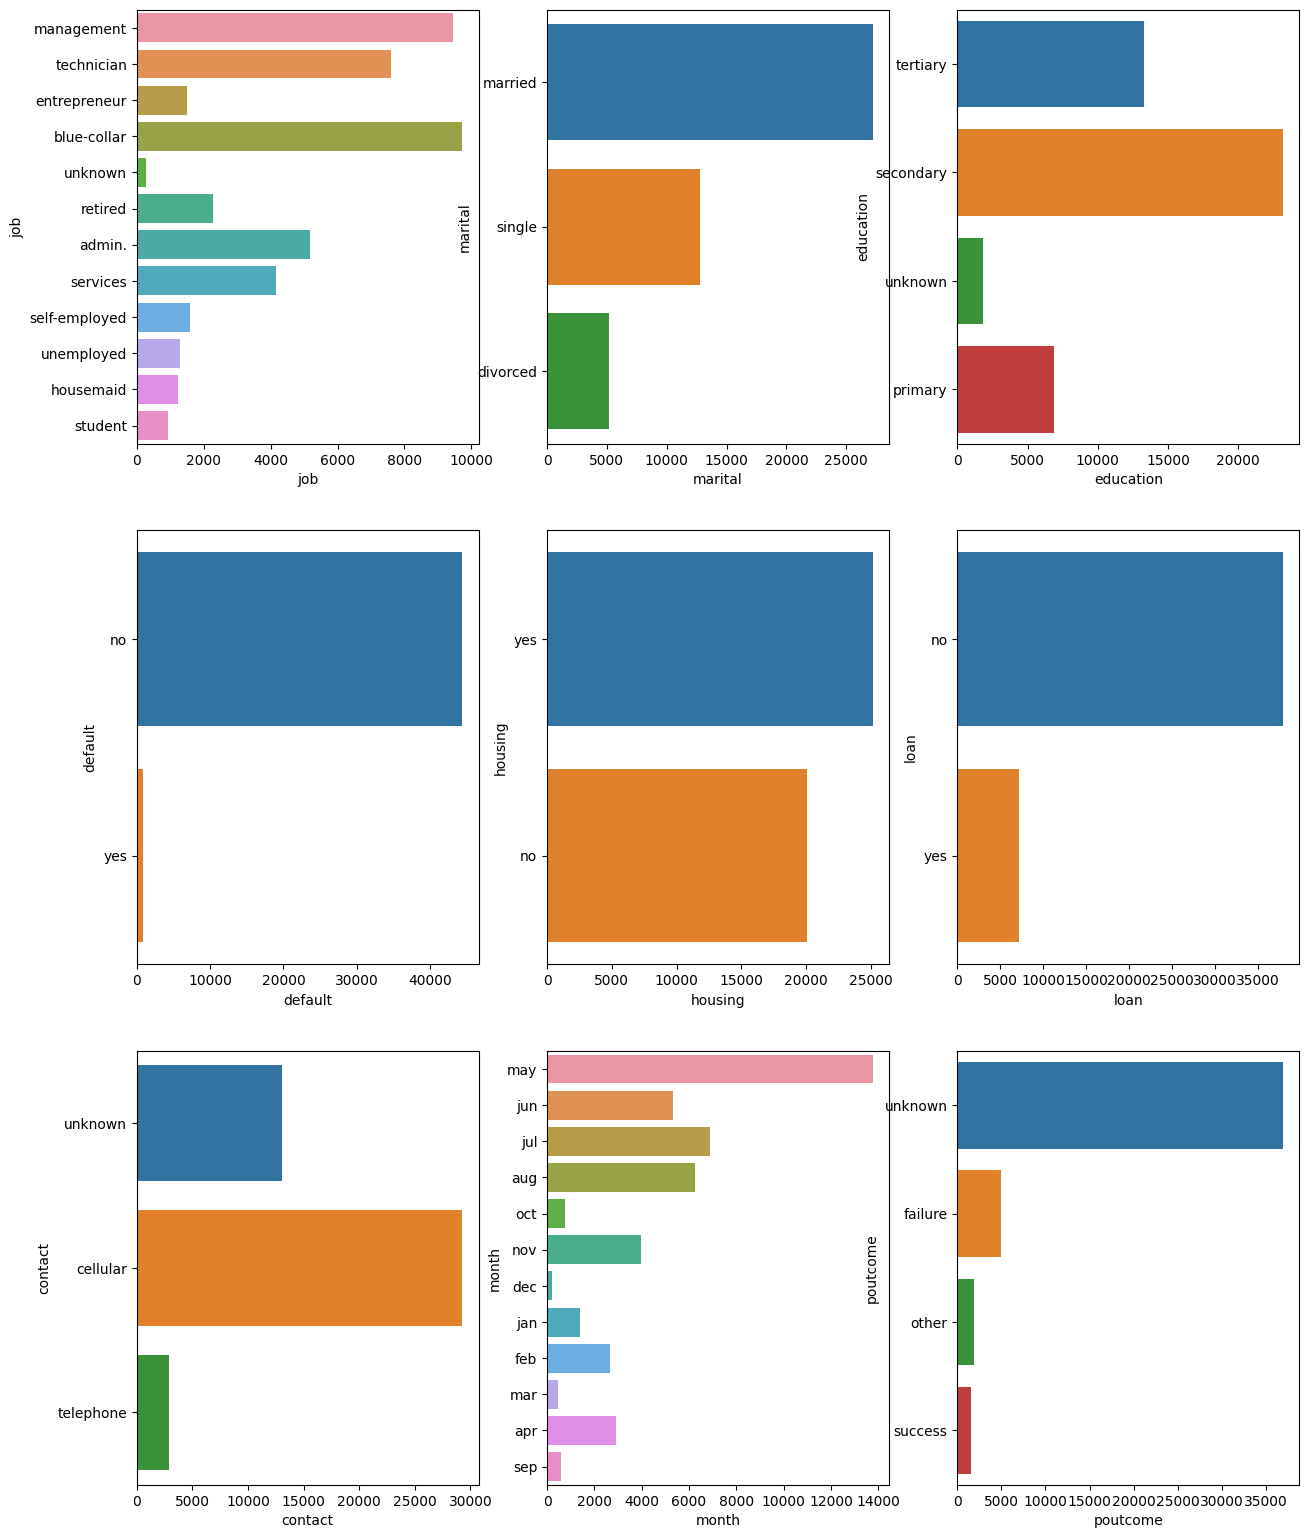

In [ ]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber = 1
for categorical_feature in categorical_features:
  ax = plt.subplot(12,3, plotnumber)
  sns.countplot(y=categorical_feature,data= bank_df)
  plt.xlabel(categorical_feature)
  plotnumber+=1
plt.show()

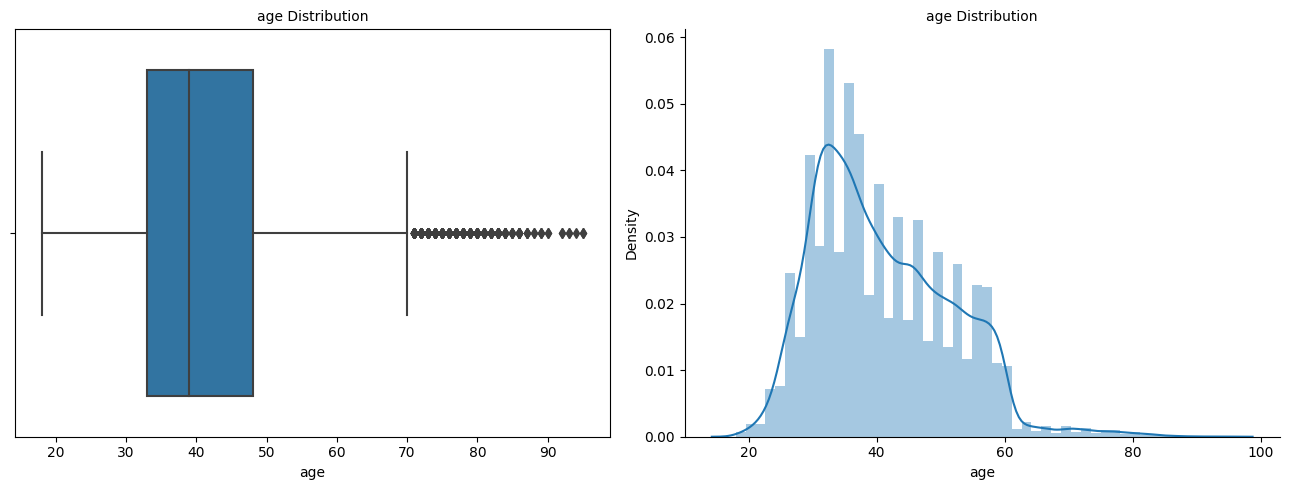

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = bank_df, orient = 'v', ax = ax1)
ax1.set_xlabel('age', fontsize=10)
ax1.set_title('age Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_df['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('age', fontsize=10)
ax2.set_title('age Distribution', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [ ]:
# Quartiles
print('1º Quartile: ', bank_df['age'].quantile(q = 0.25))
print('2º Quartile: ', bank_df['age'].quantile(q = 0.50))
print('3º Quartile: ', bank_df['age'].quantile(q = 0.75))
print('4º Quartile: ', bank_df['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR

print("age above:", bank_df['age'].quantile(q = 0.75) +
                      1.5*(bank_df['age'].quantile(q = 0.75) - bank_df['age'].quantile(q = 0.25)), 'are outliers')
print('Numerber of outliers: ', bank_df[bank_df['age'] >70.5 ]['age'].count())

1º Quartile:  33.0
2º Quartile:  39.0
3º Quartile:  48.0
4º Quartile:  95.0
age above: 70.5 are outliers
Numerber of outliers:  487


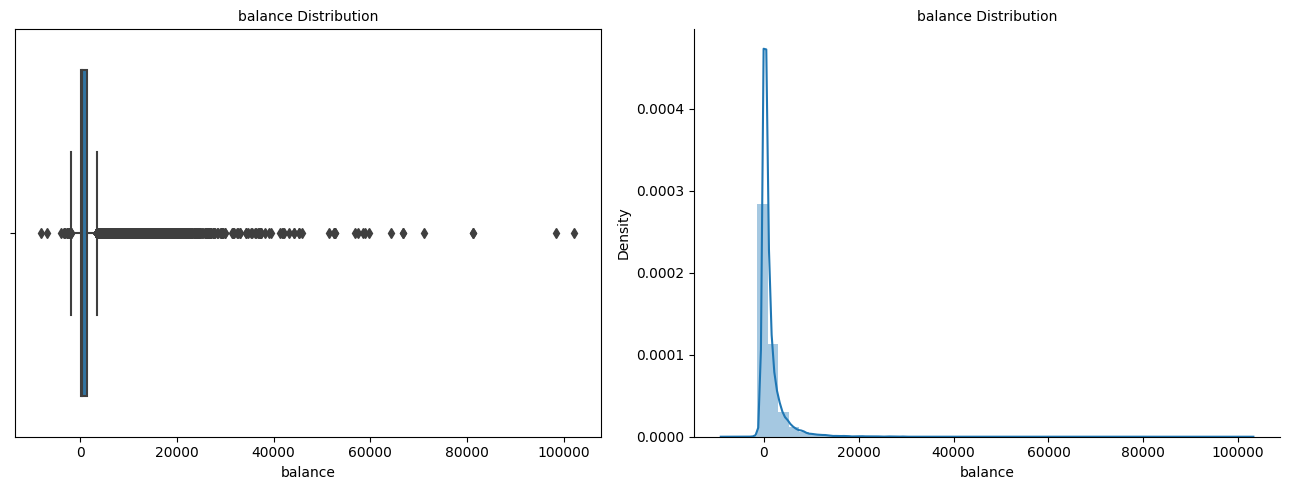

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'balance', data = bank_df, orient = 'v', ax = ax1)
ax1.set_xlabel('balance', fontsize=10)
ax1.set_title('balance Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_df['balance'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('balance', fontsize=10)
ax2.set_title('balance Distribution', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [ ]:
# Quartiles
print('1º Quartile: ', bank_df['balance'].quantile(q = 0.25))
print('2º Quartile: ', bank_df['balance'].quantile(q = 0.50))
print('3º Quartile: ', bank_df['balance'].quantile(q = 0.75))
print('4º Quartile: ', bank_df['balance'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR

print("balance:", bank_df['balance'].quantile(q = 0.75) +
                      1.5*(bank_df['balance'].quantile(q = 0.75) - bank_df['balance'].quantile(q = 0.25)), 'are outliers')
print('Numerber of outliers: ', bank_df[bank_df['balance'] >3462 ]['balance'].count())

1º Quartile:  72.0
2º Quartile:  448.0
3º Quartile:  1428.0
4º Quartile:  102127.0
balance: 3462.0 are outliers
Numerber of outliers:  4712


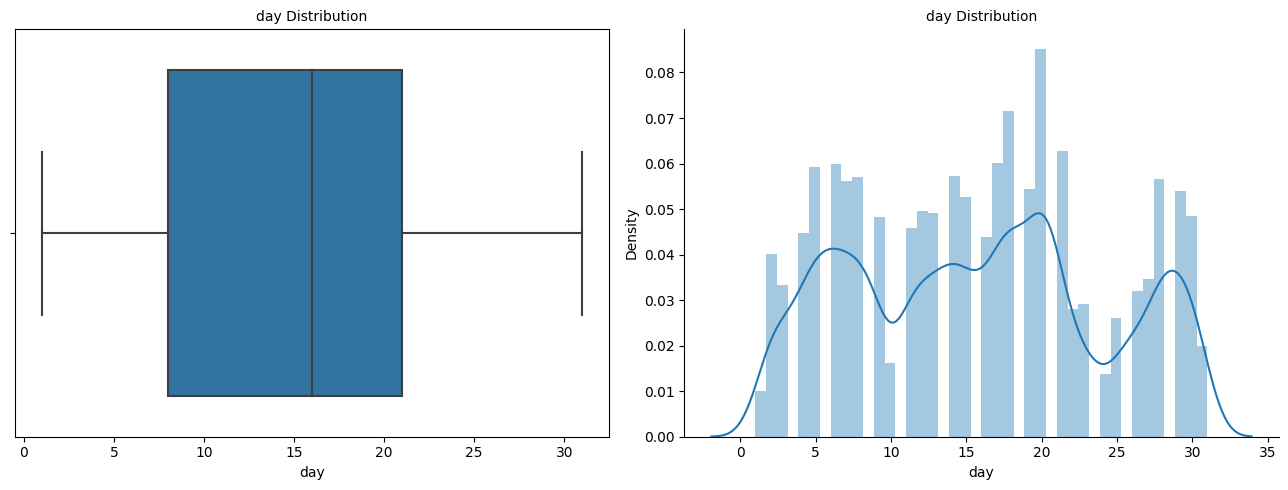

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'day', data = bank_df, orient = 'v', ax = ax1)
ax1.set_xlabel('day', fontsize=10)
ax1.set_title('day Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_df['day'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('day', fontsize=10)
ax2.set_title('day Distribution', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [ ]:
# Quartiles
print('1º Quartile: ', bank_df['day'].quantile(q = 0.25))
print('2º Quartile: ', bank_df['day'].quantile(q = 0.50))
print('3º Quartile: ', bank_df['day'].quantile(q = 0.75))
print('4º Quartile: ', bank_df['day'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR

print("day:", bank_df['day'].quantile(q = 0.75) +
                      1.5*(bank_df['day'].quantile(q = 0.75) - bank_df['day'].quantile(q = 0.25)), 'are outliers')
print('Numerber of outliers: ', bank_df[bank_df['day'] >40.5 ]['day'].count())



1º Quartile:  8.0
2º Quartile:  16.0
3º Quartile:  21.0
4º Quartile:  31.0
day: 40.5 are outliers
Numerber of outliers:  0


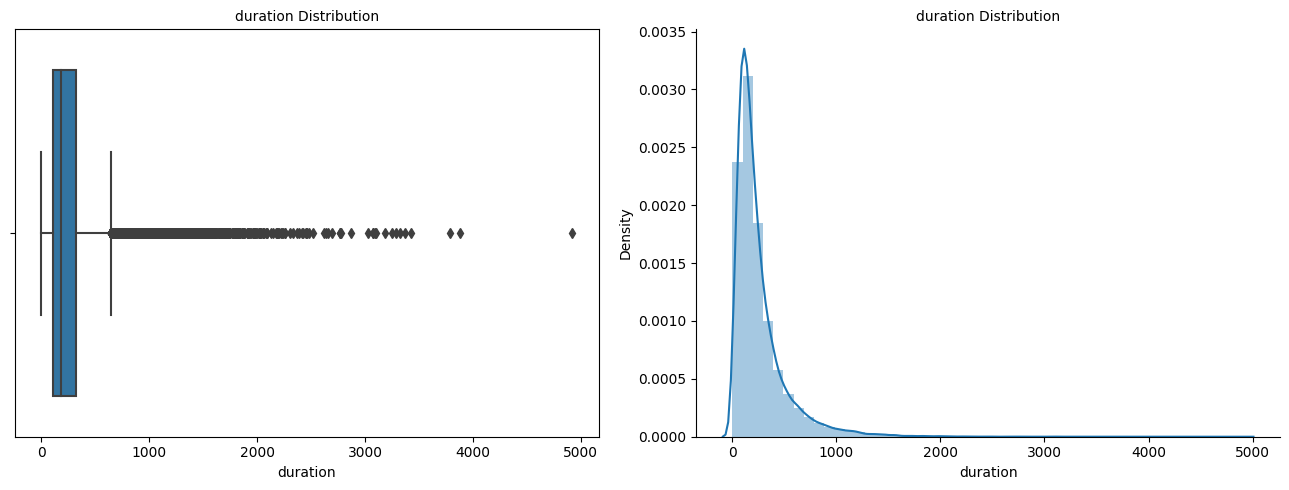

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = bank_df, orient = 'v', ax = ax1)
ax1.set_xlabel('duration', fontsize=10)
ax1.set_title('duration Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_df['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('duration', fontsize=10)
ax2.set_title('duration Distribution', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [ ]:
# Quartiles
print('1º Quartile: ', bank_df['duration'].quantile(q = 0.25))
print('2º Quartile: ', bank_df['duration'].quantile(q = 0.50))
print('3º Quartile: ', bank_df['duration'].quantile(q = 0.75))
print('4º Quartile: ', bank_df['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR

print("duration:", bank_df['duration'].quantile(q = 0.75) +
                      1.5*(bank_df['duration'].quantile(q = 0.75) - bank_df['duration'].quantile(q = 0.25)), 'are outliers')
print('Numerber of outliers: ', bank_df[bank_df['duration'] > 643]['duration'].count())

1º Quartile:  103.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0
duration: 643.0 are outliers
Numerber of outliers:  3235


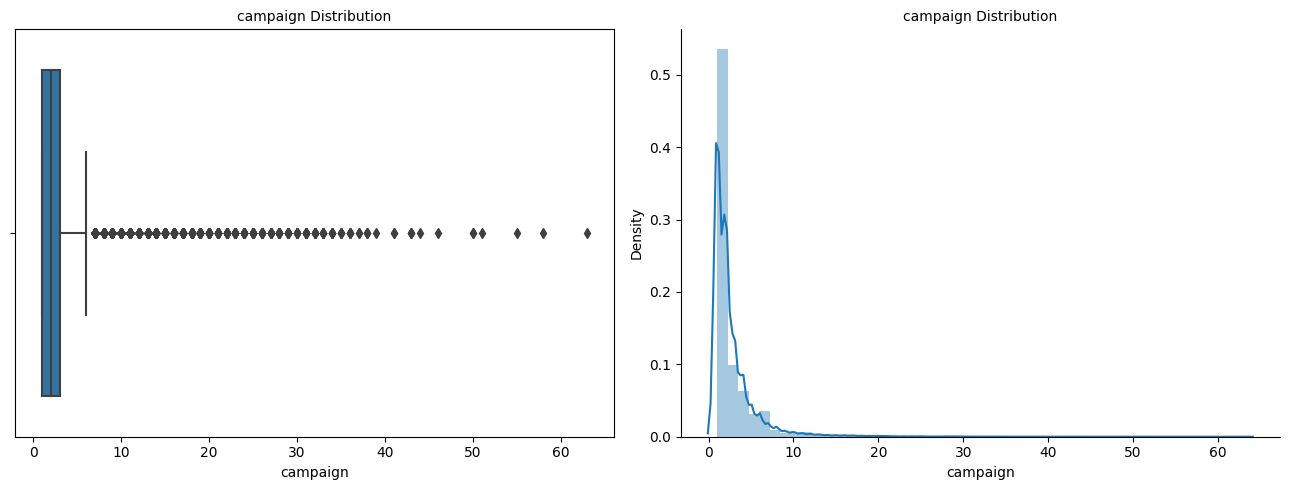

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'campaign', data = bank_df, orient = 'v', ax = ax1)
ax1.set_xlabel('campaign', fontsize=10)
ax1.set_title('campaign Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_df['campaign'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('campaign', fontsize=10)
ax2.set_title('campaign Distribution', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [ ]:
# Quartiles
print('1º Quartile: ', bank_df['campaign'].quantile(q = 0.25))
print('2º Quartile: ', bank_df['campaign'].quantile(q = 0.50))
print('3º Quartile: ', bank_df['campaign'].quantile(q = 0.75))
print('4º Quartile: ', bank_df['campaign'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR

print("campaign:", bank_df['campaign'].quantile(q = 0.75) +
                      1.5*(bank_df['campaign'].quantile(q = 0.75) - bank_df['campaign'].quantile(q = 0.25)), 'are outliers')
print('Numerber of outliers: ', bank_df[bank_df['campaign'] >6 ]['campaign'].count())


1º Quartile:  1.0
2º Quartile:  2.0
3º Quartile:  3.0
4º Quartile:  63.0
campaign: 6.0 are outliers
Numerber of outliers:  3064


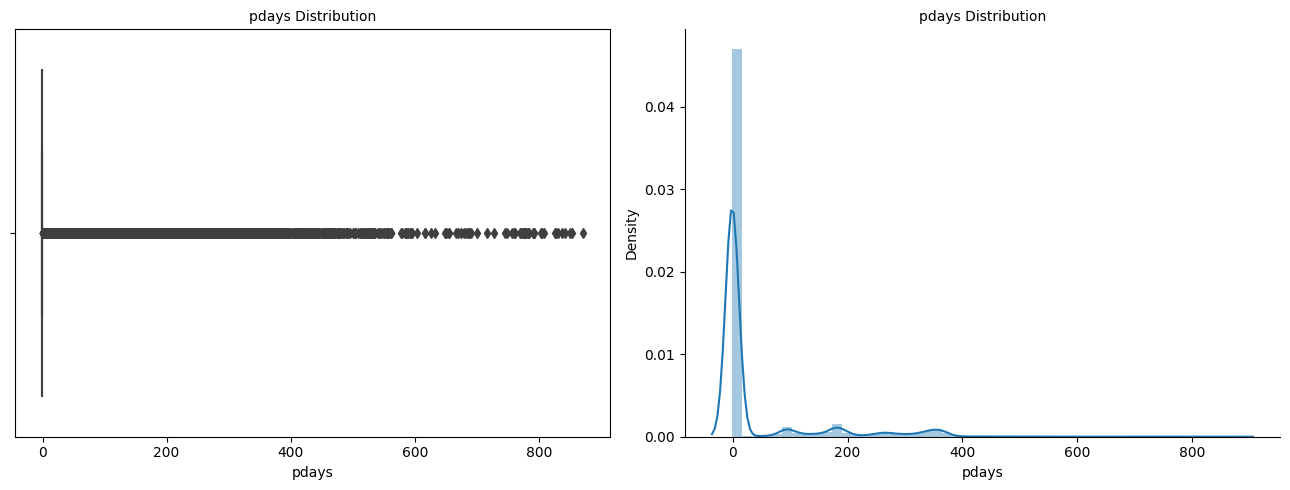

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'pdays', data = bank_df, orient = 'v', ax = ax1)
ax1.set_xlabel('pdays', fontsize=10)
ax1.set_title('pdays Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_df['pdays'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('pdays', fontsize=10)
ax2.set_title('pdays Distribution', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [ ]:
# Quartiles
print('1º Quartile: ', bank_df['pdays'].quantile(q = 0.25))
print('2º Quartile: ', bank_df['pdays'].quantile(q = 0.50))
print('3º Quartile: ', bank_df['pdays'].quantile(q = 0.75))
print('4º Quartile: ', bank_df['pdays'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR

print("pdays:", bank_df['pdays'].quantile(q = 0.75) +
                      1.5*(bank_df['pdays'].quantile(q = 0.75) - bank_df['pdays'].quantile(q = 0.25)), 'are outliers')
print('Numerber of outliers: ', bank_df[bank_df['pdays'] >-1 ]['pdays'].count())


1º Quartile:  -1.0
2º Quartile:  -1.0
3º Quartile:  -1.0
4º Quartile:  871.0
pdays: -1.0 are outliers
Numerber of outliers:  8257


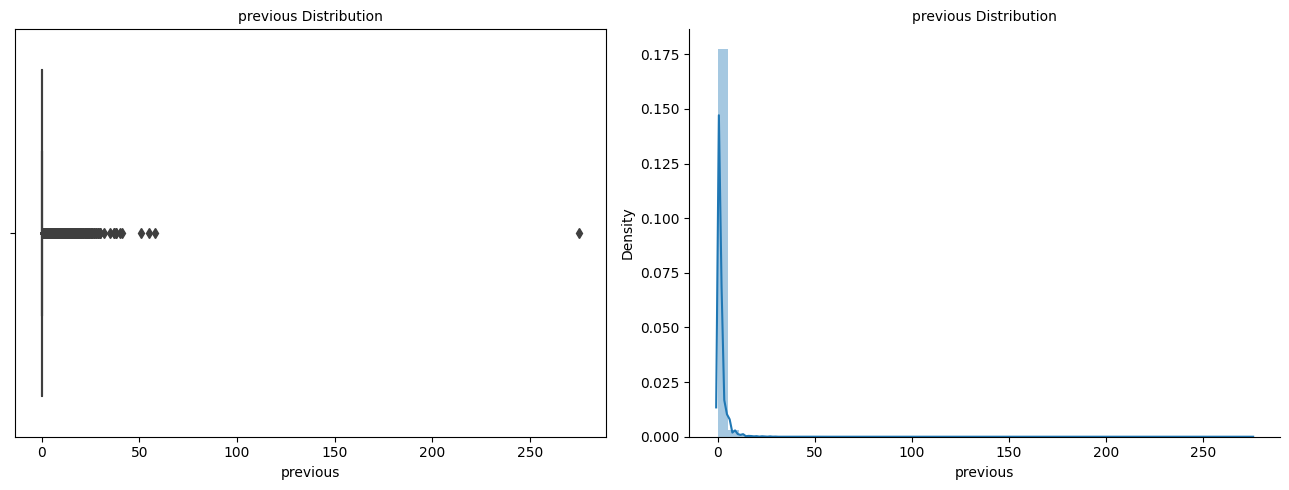

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'previous', data = bank_df, orient = 'v', ax = ax1)
ax1.set_xlabel('previous', fontsize=10)
ax1.set_title('previous Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(bank_df['previous'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('previous', fontsize=10)
ax2.set_title('previous Distribution', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [ ]:
# Quartiles
print('1º Quartile: ', bank_df['previous'].quantile(q = 0.25))
print('2º Quartile: ', bank_df['previous'].quantile(q = 0.50))
print('3º Quartile: ', bank_df['previous'].quantile(q = 0.75))
print('4º Quartile: ', bank_df['previous'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR

print("previous:", bank_df['previous'].quantile(q = 0.75) +
                      1.5*(bank_df['previous'].quantile(q = 0.75) - bank_df['previous'].quantile(q = 0.25)), 'are outliers')
print('Numerber of outliers: ', bank_df[bank_df['previous'] >0 ]['previous'].count())


1º Quartile:  0.0
2º Quartile:  0.0
3º Quartile:  0.0
4º Quartile:  275.0
previous: 0.0 are outliers
Numerber of outliers:  8257


<Axes: >

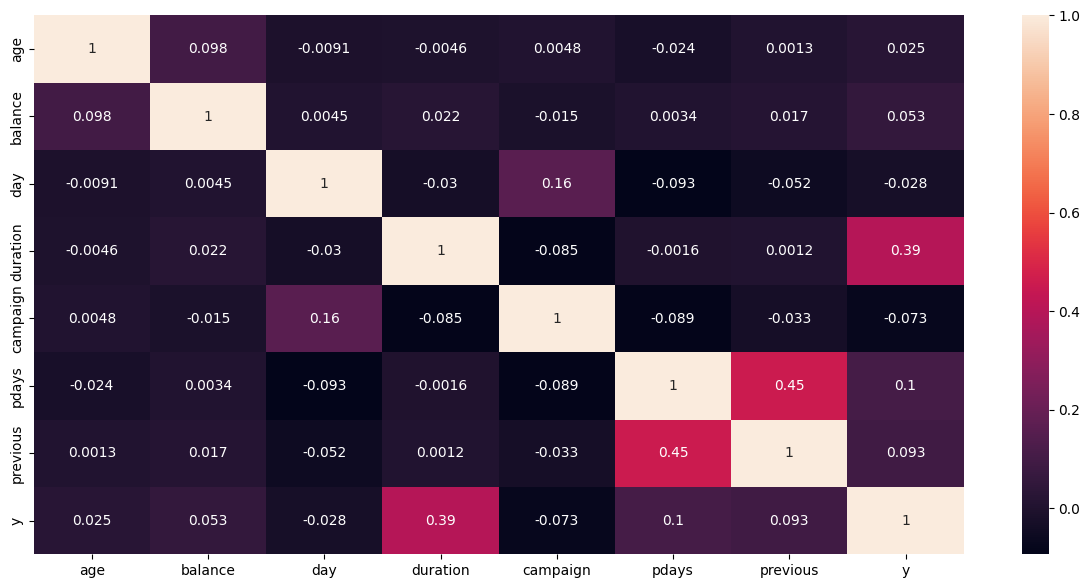

In [ ]:
## Checking for correlation
cor_mat=bank_df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

## it doesnt seen to be heavily correlated with other features except pdays,previous and duration

# **As per EDA**


*   There is no missing value found
*   some outliers found in most of numerical features
*   day feature has no outliers and normally distributed
*   pdays,previous,duration and y are sliglty correlated
*   balance,campaign,pdays,previous and duration features has so many outliers
*   it is highly imbalanced dataset








In [ ]:
# FEATURE SELECTION USING RANDOM CLASSIFIER
## splitting the data into 70% training data and 30% test data
X = df_features.drop(['y'], axis=1)
y = df_features['y']

trainx, testx, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=0)

# **Random classifier**
##  It's a classifier that combines a number of decision trees on different subsets of a dataset and averages the results to increase the dataset's predicted accuracy

In [ ]:
## Use randomforest classifier
rfc = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
rfc.fit(trainx, trainy)

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=0)

In [ ]:
# Print the name and gini importance of each feature
feat_labels = X.columns.values

feature_importance = []
for feature in zip(feat_labels, rfc.feature_importances_):

    feature_importance.append(feature)

In [ ]:
feature_importance

[('age', 0.09569410901411099),
 ('balance', 0.09887994126115736),
 ('day', 0.08611194758766634),
 ('duration', 0.2777323979607295),
 ('campaign', 0.03906021566938216),
 ('pdays', 0.04037196156702654),
 ('previous', 0.020540162203151933),
 ('job_blue-collar', 0.009149767106086447),
 ('job_entrepreneur', 0.003712773749512612),
 ('job_housemaid', 0.0033282535789580475),
 ('job_management', 0.010761448871293553),
 ('job_retired', 0.005121712235730031),
 ('job_self-employed', 0.004671134696702627),
 ('job_services', 0.006750373830462801),
 ('job_student', 0.004629050088361861),
 ('job_technician', 0.011273272813274034),
 ('job_unemployed', 0.0048858090667271),
 ('job_unknown', 0.0015599874502991936),
 ('marital_married', 0.012160924903767757),
 ('marital_single', 0.009934129913327124),
 ('education_secondary', 0.013235934184407746),
 ('education_tertiary', 0.011866292311754486),
 ('education_unknown', 0.0056111308957821245),
 ('default_yes', 0.0018805562984698068),
 ('housing_yes', 0.021281

In [ ]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.01

sfm = SelectFromModel(rfc, threshold=0.01)

# Train the selector
sfm.fit(trainx, trainy)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10000, n_jobs=-1,
                                                 random_state=0),
                threshold=0.01)

In [ ]:
# Print the names of the most important features
selected_features = []
for feature_list_index in sfm.get_support(indices=True):
    selected_features.append(feat_labels[feature_list_index])
selected_features

['age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'job_management',
 'job_technician',
 'marital_married',
 'education_secondary',
 'education_tertiary',
 'housing_yes',
 'contact_unknown',
 'month_aug',
 'month_mar',
 'month_may',
 'month_oct',
 'poutcome_success']

In [ ]:
data_selected = df_features[selected_features]
data_selected.head()

,age,balance,day,duration,campaign,pdays,previous,job_management,job_technician,marital_married,education_secondary,education_tertiary,housing_yes,contact_unknown,month_aug,month_mar,month_may,month_oct,poutcome_success
0,58,2143,5,261,1,-1,0,1,0,1,0,1,1,1,0,0,1,0,0
1,44,29,5,151,1,-1,0,0,1,0,1,0,1,1,0,0,1,0,0
2,33,2,5,76,1,-1,0,0,0,1,1,0,1,1,0,0,1,0,0
3,47,1506,5,92,1,-1,0,0,0,1,0,0,1,1,0,0,1,0,0
4,33,1,5,198,1,-1,0,0,0,0,0,0,0,1,0,0,1,0,0


In [ ]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   job_management       45211 non-null  uint8
 8   job_technician       45211 non-null  uint8
 9   marital_married      45211 non-null  uint8
 10  education_secondary  45211 non-null  uint8
 11  education_tertiary   45211 non-null  uint8
 12  housing_yes          45211 non-null  uint8
 13  contact_unknown      45211 non-null  uint8
 14  month_aug            45211 non-null  uint8
 15  month_mar            45211 non-null  uint8
 16  month_may            4

## **STANDARDIZING THE DATA USING MINMAXSCALER**
### STANDARDIZING:This technique is to re-scale features value with the distribution value between 0 and 1 is useful for the optimization algorithms, such as gradient descent, that are used within machine learning algorithms that weight inputs
### MinMaxScaler:scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scaling compresses all the inliers in the narrow range [0, 0.005].

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data_selected)
data_standardised = scaler.fit_transform(data_selected)

In [ ]:
data_std= pd.DataFrame(data_standardised)
data_std.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.194805,0.072822,0.133333,0.015453,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.376623,0.086476,0.133333,0.018707,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.194805,0.072812,0.133333,0.040260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
data_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       45211 non-null  float64
 1   1       45211 non-null  float64
 2   2       45211 non-null  float64
 3   3       45211 non-null  float64
 4   4       45211 non-null  float64
 5   5       45211 non-null  float64
 6   6       45211 non-null  float64
 7   7       45211 non-null  float64
 8   8       45211 non-null  float64
 9   9       45211 non-null  float64
 10  10      45211 non-null  float64
 11  11      45211 non-null  float64
 12  12      45211 non-null  float64
 13  13      45211 non-null  float64
 14  14      45211 non-null  float64
 15  15      45211 non-null  float64
 16  16      45211 non-null  float64
 17  17      45211 non-null  float64
 18  18      45211 non-null  float64
dtypes: float64(19)
memory usage: 6.6 MB


## BUILDING SUPERVISED MODELS


In [ ]:
X= data_std

In [ ]:
X.shape

(45211, 19)

In [ ]:
y= pd.DataFrame(df_features['y'])

In [ ]:
y.shape

(45211, 1)

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       45211 non-null  int64
dtypes: int64(1)
memory usage: 353.3 KB


In [ ]:
# spilting the dataset into training and testing
trainx, testx, trainy, testy = train_test_split(X, y, test_size = 0.30, random_state=10)

print("trainx ",trainx.shape)

print("testx ",testx.shape)

print("trainy ",trainy.shape)

print("testy ",testy.shape)

trainx  (31647, 19)
testx  (13564, 19)
trainy  (31647, 1)
testy  (13564, 1)


## **Logistic regression**

In [ ]:
# logistic regression performs binary classifications, and gives probability output
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
log_reg_model = sm.Logit(trainy, trainx).fit()
print(log_reg_model.summary())

Optimization terminated successfully.
         Current function value: 0.260895
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31628
Method:                           MLE   Df Model:                           18
Date:                Tue, 04 Jul 2023   Pseudo R-squ.:                  0.2807
Time:                        16:19:15   Log-Likelihood:                -8256.5
converged:                       True   LL-Null:                       -11479.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0             -1.5772      0.144    -10.978      0.000      -1.859      -1.296
1             -9.9404      0.

note that 8 iterations were performed. p value near zero or low indicates the model is statistically alright. Moving forward with prediicting y and then evaluation matrix


In [ ]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = log_reg_model.predict(testx)

# print the y_pred_prob
y_pred_prob.head()

4393     0.011338
4438     0.010819
11108    0.229157
35421    0.026489
2667     0.055946
dtype: float64

In [ ]:
# convert probabilities to 0 and 1 using 'if_else'
predy = ['0' if x < 0.5 else '1' for x in y_pred_prob]
# convert the predicted values to type 'float32'
predy = np.array(predy, dtype=np.float32)

# print the first five predictions
predy[0:5]

array([0., 0., 0., 0., 0.], dtype=float32)



The above process of considering probability is done because confusion matrix doesnot provide result when continuos and binary data is fed into it.


In [ ]:
cf1=pd.DataFrame(confusion_matrix(testy,predy),columns=['Predicted 0','Predicted 1'], index =['Actual 0','Actual 1'])
cf1

,Predicted 0,Predicted 1
Actual 0,11667,339
Actual 1,1036,522


In [ ]:
# Evaluation Metrics 2- Accuracy using Classification Report
test_report1 = classification_report(testy,predy)
print(test_report1)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     12006
           1       0.61      0.34      0.43      1558

    accuracy                           0.90     13564
   macro avg       0.76      0.65      0.69     13564
weighted avg       0.88      0.90      0.89     13564



## kappa score: is a measure of how closely the instances classified by the machine learning classifier matched the data labeled as ground truth, controlling for the accuracy of a random classifier as measured by the expected accuracy

In [ ]:
# Evaluation Metrics 3- Cohen value using Kappa score
from sklearn.metrics import cohen_kappa_score
kappa_value1 = cohen_kappa_score(testy, predy)
print(kappa_value1)

0.3809669534831541


Text(0.02, 0.9, "('AUC Score:', 0.8707)")

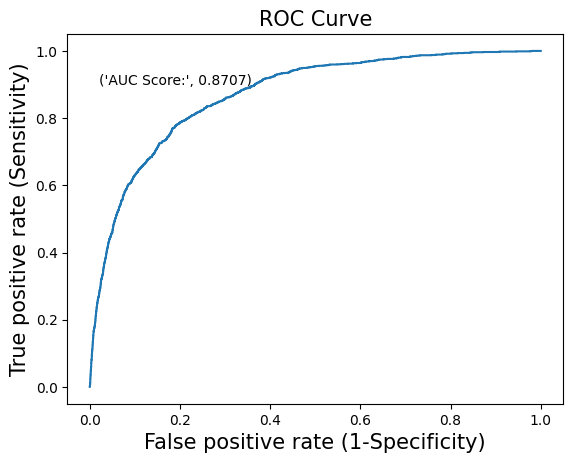

In [ ]:
# Evaluation metrics 4- Plot the ROC curve to get AUC score
fpr, tpr, thresholds = roc_curve(testy,y_pred_prob)
plt.plot(fpr, tpr)

plt.title('ROC Curve', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(testy, y_pred_prob),4)))

## An ROC curve (receiver operating characteristic curve) this graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate. False Positive Rate

In [ ]:
# tabulate the results
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score',
                                   'Kappa Score', 'f1-score'])
score_card = score_card.append({'Model': 'Logistic Regresion',
                                    'AUC Score' : roc_auc_score(testy, y_pred_prob),
                                    'Precision Score': metrics.precision_score(testy, predy),
                                    'Recall Score': metrics.recall_score(testy, predy),
                                    'Accuracy Score': metrics.accuracy_score(testy, predy),
                                    'Kappa Score': cohen_kappa_score(testy, predy),
                                    'f1-score': metrics.f1_score(testy, predy)},
                                    ignore_index = True)
score_card

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regresion,0.870672,0.606272,0.335045,0.898629,0.380967,0.431583


## **Adaboost classifier**: it is a Boosting technique used as an Ensemble Method in Machine Learning. It is called Adaptive Boosting as the weights are re-assigned to each instance, with higher weights assigned to incorrectly classified instances.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# build the model
adaboost = AdaBoostClassifier(random_state=10)
# fit the model
adaboost.fit(trainx, trainy)

AdaBoostClassifier(random_state=10)

In [ ]:
y_pred_adaboost = adaboost.predict(testx)

In [ ]:
# Evaluation Metrics 1- Confusion matrics
cf2=pd.DataFrame(confusion_matrix(testy,y_pred_adaboost),columns=['Predicted 0','Predicted 1'], index =['Actual 0','Actual 1'])
cf2

,Predicted 0,Predicted 1
Actual 0,11654,352
Actual 1,970,588


In [ ]:
# Evaluation Metrics 2- Accuracy using Classification Report
test_report2 = classification_report(testy,y_pred_adaboost)
print(test_report2)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     12006
           1       0.63      0.38      0.47      1558

    accuracy                           0.90     13564
   macro avg       0.77      0.67      0.71     13564
weighted avg       0.89      0.90      0.89     13564



In [ ]:
# Evaluation Metrics 3- Cohen value using Kappa score
kappa_value2 = cohen_kappa_score(testy, y_pred_adaboost)
print(kappa_value2)

0.42069828381830077


Text(0.02, 0.9, "('AUC Score:', 0.674)")

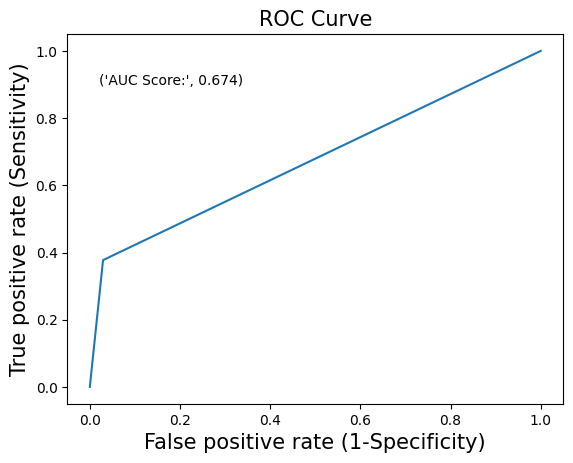

In [ ]:
# Evaluation metrics 4- Plot the ROC curve to get AUC score
fpr, tpr, thresholds = roc_curve(testy, y_pred_adaboost)
plt.plot(fpr, tpr)

plt.title('ROC Curve', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(testy, y_pred_adaboost),4)))

In [ ]:
adaboost_metrics = pd.Series({'Model': "AdaBoost",
                     'AUC Score' : metrics.roc_auc_score(testy, y_pred_adaboost),
                 'Precision Score': metrics.precision_score(testy, y_pred_adaboost),
                 'Recall Score': metrics.recall_score(testy, y_pred_adaboost),
                 'Accuracy Score': metrics.accuracy_score(testy, y_pred_adaboost),
                 'Kappa Score': cohen_kappa_score(testy, y_pred_adaboost),
                  'f1-score':metrics.f1_score(testy, y_pred_adaboost)})
score_card = score_card.append(adaboost_metrics , ignore_index = True)
score_card

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regresion,0.870672,0.606272,0.335045,0.898629,0.380967,0.431583
1,AdaBoost,0.674044,0.625532,0.377407,0.902536,0.420698,0.470777


# **K-NEAREST NEIGHBOUR(KNN)**:it is a non-parametric technique and supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

In [ ]:
# KNN is classification algorithm that provides class output, default value of n-neighbours = 5
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=5).fit(trainx,trainy.values.ravel())

In [ ]:
predy=knn_model.predict(testx)

In [ ]:
# Evaluation Metrics 1- Confusion matrics
cf3=pd.DataFrame(confusion_matrix(testy,predy),columns=['Predicted 0','Predicted 1'], index =['Actual 0','Actual 1'])
cf3

,Predicted 0,Predicted 1
Actual 0,11662,344
Actual 1,1136,422


In [ ]:
# Evaluation Metrics 2- Accuracy using Classification Report
test_report3 = classification_report(testy,predy)
print(test_report3)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     12006
           1       0.55      0.27      0.36      1558

    accuracy                           0.89     13564
   macro avg       0.73      0.62      0.65     13564
weighted avg       0.87      0.89      0.87     13564



In [ ]:
# Evaluation Metrics 3- Cohen value using Kappa score
kappa_value3 = cohen_kappa_score(testy, predy)
print(kappa_value3)

0.3109966131107075


Text(0.02, 0.9, "('AUC Score:', 0.6211)")

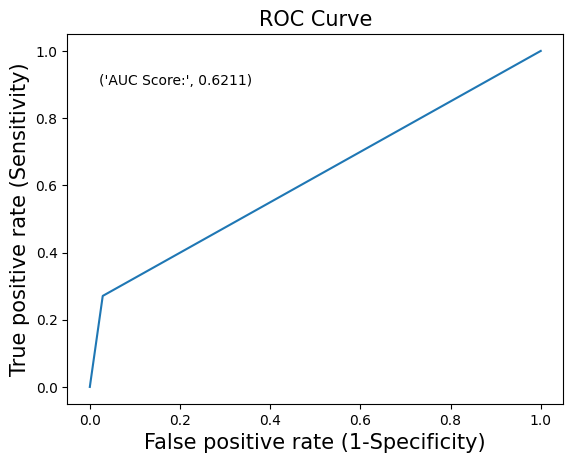

In [ ]:
# Evaluation metrics 4- Plot the ROC curve to get AUC score
fpr, tpr, thresholds = roc_curve(testy, predy)
plt.plot(fpr, tpr)

plt.title('ROC Curve', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(testy, predy),4)))

In [ ]:
knn_metrics = pd.Series({'Model': "KNN",
                     'AUC Score' : metrics.roc_auc_score(testy, predy),
                 'Precision Score': metrics.precision_score(testy, predy),
                 'Recall Score': metrics.recall_score(testy, predy),
                 'Accuracy Score': metrics.accuracy_score(testy,predy),
                 'Kappa Score': cohen_kappa_score(testy, predy),
                  'f1-score':metrics.f1_score(testy, predy)})
score_card = score_card.append(knn_metrics , ignore_index = True)
score_card

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regresion,0.870672,0.606272,0.335045,0.898629,0.380967,0.431583
1,AdaBoost,0.674044,0.625532,0.377407,0.902536,0.420698,0.470777
2,KNN,0.621104,0.550914,0.270860,0.890888,0.310997,0.363167


# **SUPPORT VECTOR MACHINE(SVM)**: Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.



In [ ]:
# provides class output
from sklearn.svm import SVC
from sklearn import linear_model
svm_lin_model= SVC(kernel='linear').fit(trainx,trainy.values.ravel())

In [ ]:
predy=svm_lin_model.predict(testx)

In [ ]:
# Evaluation Metrics 1- Confusion matrics
cf4=pd.DataFrame(confusion_matrix(testy,predy),columns=['Predicted 0','Predicted 1'], index =['Actual 0','Actual 1'])
cf4

,Predicted 0,Predicted 1
Actual 0,11844,162
Actual 1,1269,289


In [ ]:
# Evaluation Metrics 2- Accuracy using Classification Report
test_report4 = classification_report(testy,predy)
print(test_report4)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12006
           1       0.64      0.19      0.29      1558

    accuracy                           0.89     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564



In [ ]:
# Evaluation Metrics 3- Cohen value using Kappa score
kappa_value4 = cohen_kappa_score(testy, predy)
print(kappa_value4)

0.2489741053892549


Text(0.02, 0.9, "('AUC Score:', 0.586)")

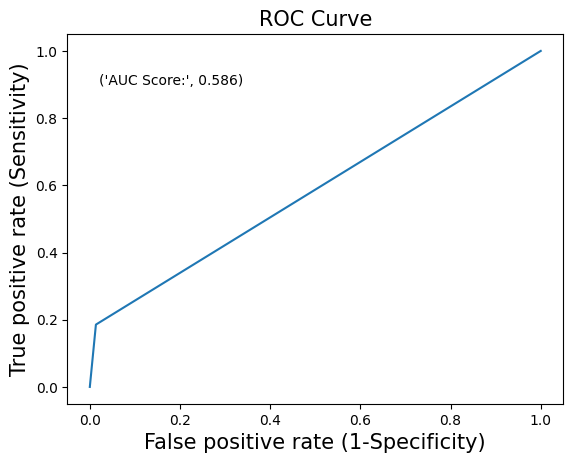

In [ ]:
# Evaluation metrics 4- Plot the ROC curve to get AUC score
fpr, tpr, thresholds = roc_curve(testy, predy)
plt.plot(fpr, tpr)

plt.title('ROC Curve', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(testy, predy),4)))

In [ ]:
svm_metrics = pd.Series({'Model': "SVM",
                     'AUC Score' : metrics.roc_auc_score(testy, predy),
                 'Precision Score': metrics.precision_score(testy, predy),
                 'Recall Score': metrics.recall_score(testy, predy),
                 'Accuracy Score': metrics.accuracy_score(testy,predy),
                 'Kappa Score': cohen_kappa_score(testy, predy),
                  'f1-score':metrics.f1_score(testy, predy)})
score_card = score_card.append(svm_metrics , ignore_index = True)
score_card

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Logistic Regresion,0.870672,0.606272,0.335045,0.898629,0.380967,0.431583
1,AdaBoost,0.674044,0.625532,0.377407,0.902536,0.420698,0.470777
2,KNN,0.621104,0.550914,0.270860,0.890888,0.310997,0.363167
3,SVM,0.586000,0.640798,0.185494,0.894500,0.248974,0.287705


AUC score of Logistic Regression is high which makes it a good model for prediction. But higher recall, accuracy, kappa and f1 score makes Adaboost the better model in comparision with all the others.


## **Conclusion**
### From this project, we learned how banks can improve their marketing campaigns by focusing their efforts on certain prime-grade clients and also how they can recognize market conditions which are favorable to increase client subscription for the fixed-term products they are offering. All of this was possible by implementing data science and machine learning methods in Python. Tools such as dataframes, arrays, for loops,etc. were all critical for the success of this project. A large number of other tools and techniques from the Python for Data Science course were used and these were invaluable for making our analyses and predictions. This project demonstrated how powerful Python can be for data science applications.